# 00_MIHO_TEST

- Last update : 2022.04.01

## # MIHO TEST  
>1. LOAD THE DATASET 
>2. APPLY THE SQL
>3. PLOT THE DATASET

### Loading Packages 

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Setting the CRS
When we create a GeoDataFrame from a shapefile, the CRS is already imported for us.

In [12]:
# Load a GeoDataFrame containing regions in MH
GIS_MHDB_PATH = "../99_GIS_TEST_DB/MHW/"

MH_WSD = gpd.read_file(GIS_MHDB_PATH+'mhw47.shp')
print(MH_WSD.crs)

PROJCS["Transverse_Mercator",GEOGCS["WGS 84",DATUM["D_unknown",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.002890277778],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",500000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [13]:
MH_SEG = gpd.read_file(GIS_MHDB_PATH+'10SEG.shp')
print(MH_SEG.crs)

PROJCS["Transverse_Mercator",GEOGCS["WGS 84",DATUM["D_unknown",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.002890277778],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",500000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


## Check for the Tables 

In [14]:
print (">>> cols : ", MH_WSD.columns.tolist())

MH_WSD.head()

>>> cols :  ['PolygonID', 'StreamLink', 'StreamLen', 'DSNodeID', 'DSWSID', 'US1WSID', 'US2WSID', 'Area_M', 'Area_Acre', 'Area_SqMi', 'AveSlope', 'ModelSeg', 'ROAD', 'PERLND', 'IMPERLND', 'AREA', 'ModelSeg2', 'ModelSeg47', 'MSegThie', 'ID', 'RCHRES', 'ATT', 'WCOMP', 'Statics', 'UNIT', 'N1HB_001', 'N1HR1_003', 'N1HR2_004', 'N1HR3_005', 'N1HR4_006', 'N1HR85_002', 'N1MB_007', 'N1MR85_008', 'N1MR1_009', 'N1MR2_010', 'N1MR3_011', 'N1MR4_012', 'N1MB_013', 'N1MR85_014', 'N1MR1_015', 'N1MR2_016', 'N1MR3_017', 'N1MR4_018', 'N1DB_019', 'N1DR85_020', 'N1DR1_021', 'N1DR2_022', 'N1DR3_023', 'N1DR4_024', 'N1LB_025', 'N1LR85_026', 'N1LR1_027', 'N1LR2_028', 'N1LR3_029', 'N1LR4_030', 'N2HB_001', 'N2HR85_002', 'N2HR1_003', 'N2HR2_004', 'N2HR3_005', 'N2HR4_006', 'N2MB_007', 'N2MR85_008', 'N2MR1_009', 'N2MR2_010', 'N2MR3_011', 'N2MR4_012', 'N2MB_013', 'N2MR85_014', 'N2MR1_015', 'N2MR2_016', 'N2MR3_017', 'N2MR4_018', 'N2DB_019', 'N2DR85_020', 'N2DR1_021', 'N2DR2_022', 'N2DR3_023', 'N2DR4_024', 'N2LB_025', '

,PolygonID,StreamLink,StreamLen,DSNodeID,DSWSID,US1WSID,US2WSID,Area_M,Area_Acre,Area_SqMi,...,N18TR__032,RN2TB_031,RN2TR1_033,RN2TR2_034,RN2TR3_035,RN2TR4_036,RN2TR__032,MORAN_STD,MORAN_LAG,geometry
0,0,1.0,6232.0,-1.0,19.0,-1.0,-1.0,69713000.0,17226.0,26.916,...,147137.95560,0.654386,0.627004,0.617227,0.621654,0.665763,0.634184,-0.065937,-0.276773,"POLYGON ((243206.270 394779.800, 243221.270 39..."
1,1,2.0,4099.0,-1.0,19.0,-1.0,-1.0,35335000.0,8731.4,13.643,...,72802.87273,0.721746,0.699379,0.687576,0.690307,0.720839,0.700417,-0.207027,-0.168916,"POLYGON ((237686.270 393729.800, 237701.270 39..."
2,19,20.0,14322.0,-1.0,30.0,1.0,0.0,83465000.0,20625.0,32.226,...,171130.18800,0.636944,0.596971,0.582829,0.584849,0.632678,0.600698,-0.271896,-0.224531,"POLYGON ((235346.270 388839.800, 235361.270 38..."
3,2,3.0,5579.0,15.0,18.0,-1.0,-1.0,61219000.0,15127.0,23.637,...,125593.89680,0.637419,0.609438,0.600318,0.603897,0.646631,0.616296,-0.351395,-0.333403,"POLYGON ((249896.270 387219.800, 249911.270 38..."
4,3,4.0,19752.0,13.0,27.0,-1.0,-1.0,110990000.0,27427.0,42.855,...,212267.01410,0.605803,0.555650,0.545845,0.536557,0.586751,0.557531,-0.752069,-0.424106,"POLYGON ((255506.270 384309.800, 255521.270 38..."


In [15]:
MH_SEG.head()

,ModelSeg2,SEG_NAME,AREA_km2,geometry
0,1,SEG-01,278.954662,"POLYGON ((243371.270 394584.800, 243386.270 39..."
1,10,SEG-10,209.472862,"POLYGON ((217211.270 358524.800, 217226.270 35..."
2,2,SEG-02,29.826675,"POLYGON ((244496.270 370599.800, 244511.270 37..."
3,3,SEG-03,124.076363,"POLYGON ((231431.270 383424.800, 231446.270 38..."
4,4,SEG-04,131.439713,"POLYGON ((255761.270 384279.800, 255761.270 38..."


## plotting the map with annotation 

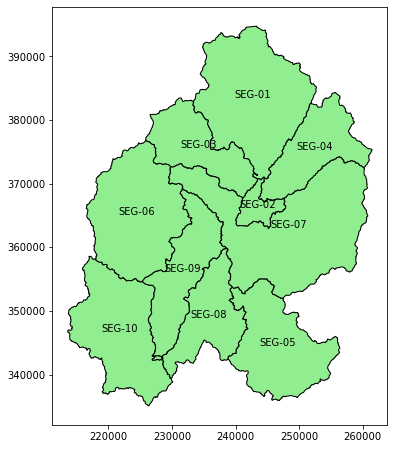

In [16]:
## plotting the map with annotation 

ax = MH_SEG.plot(figsize =(6,8), color='lightgreen', edgecolor='black')
MH_SEG.apply(lambda x: ax.annotate(text=x['SEG_NAME'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);

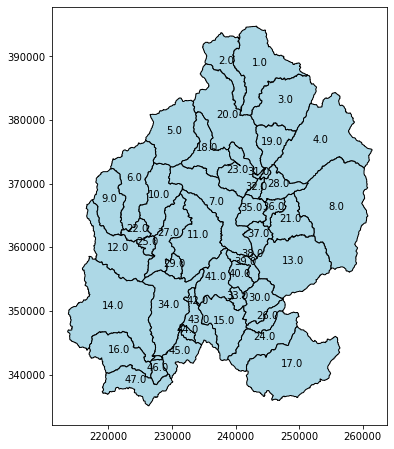

In [17]:
## plotting the map with annotation 

ax2 = MH_WSD.plot(figsize =(6,8), color='lightblue', edgecolor='black')
MH_WSD.apply(lambda x: ax2.annotate(text=x['StreamLink'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);